# Correlação

#### Imports

In [ ]:
import numpy as np
import pandas as pd

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
import matplotlib.pyplot as plt

## Covariância

In [ ]:
df = pd.DataFrame({
    'a':[1,3,4,6,8],
    'b':[2,3,5,6,8],
    'c':[6,5,4,3,2],
    'd':[5,4,3,4,6]
})
df

In [ ]:
plt.scatter(df['a'], df['b'])
plt.xlabel('a')
plt.ylabel('b')

In [ ]:
plt.scatter(df['b'], df['c'])
plt.xlabel('b')
plt.ylabel('c')

In [ ]:
plt.scatter(df['c'], df['d'])
plt.xlabel('c')
plt.ylabel('d')

#### Fórmula:

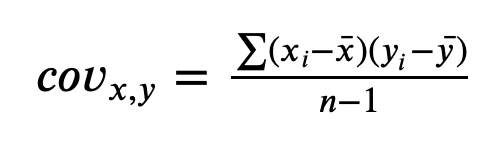

#### Calculando a covariância

Covariância de a, b

In [ ]:
df['a'].cov(df['b'])

Covariância de b, c

In [ ]:
df['b'].cov(df['c'])

Covariância de a,b e b,a.

Variância de a; variância de b.

In [ ]:
df[['a', 'b']].cov()

## Variância

Variância é a distribuição de valores em um conjunto de dados em torno da média. Ela informa a que distância cada valor do dataset está de sua média. 

Fórmula para calcular a variância (s²):

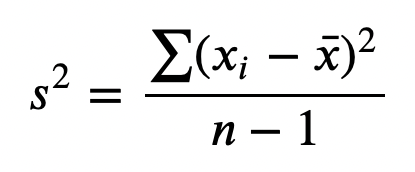

Uma grande variância indica que os números no conjunto de dados estão longe da média e distantes uns dos outros. Uma pequena variância, por outro lado, indica que os números estão próximos da média e entre si.

In [ ]:
g = sns.stripplot(data = df.melt(), 
                  x = 'variable', 
                  y = 'value', 
                  color = 'red')
sns.boxplot(data = df.melt(),
            x = 'variable', 
            y = 'value', 
            color = 'yellow')

#### Calculando a variância de uma série

In [ ]:
df.a.var()

#### Calculando para todo o dataset

In [ ]:
df.var()

## Covariância / Variância

In [ ]:
df['a'].cov(df['a']) == df['a'].var()

In [ ]:
df.cov()

## Cálculo de correlação com Pandas

#### Criando um dataset para ilustrar correlação positiva

In [ ]:
# seed para geração de números aleatórios
seed(12)

# produzindo os dados
d1 = 30 * randn(1500) + 100
d2 = d1 + (20 * randn(1500) + 50)

# criando o dataframe
df = pd.DataFrame({'Column1': d1, 'Column2': d2})

# sumários
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
plt.scatter(d1, d2)
plt.show()

In [ ]:
df.head()

## Calculando as correlações

**Veremos:**

* Pearson’s r

* Spearman’s ρ (rho)

* Kendall’s τ (tau)

**Coeficiente de Correlação**

* +1: Correlação positiva
* 0: Não há correlação
* -1: Correlação negativa

**P-valor**

* p <0,001: Muita certeza do resultado
* p <0,05: Certeza moderada do resultado
* p <0,1: Pouca certeza do resultado
* p > 0,1: Não há certeza do resultado


#### Pearson

Aplicado em Correlações Lineares

Dados numéricos

Fórmula:





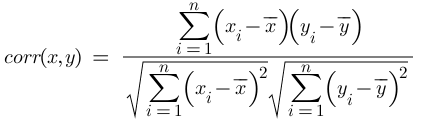

In [ ]:
df.head()

In [ ]:
mean_x = df.Column1.mean()
mean_y = df.Column2.mean()
df['xdiff'] = df.Column1 - mean_x
df['ydiff'] = df.Column2 - mean_y
df['diffprod'] = df['xdiff'] * df['ydiff']
df['xdiff2'] = df['xdiff']**2
df['ydiff2'] = df['ydiff']**2
df.head()

In [ ]:
from math import sqrt
corr = df['diffprod'].sum() / (sqrt(df['xdiff2'].sum()) * sqrt(df['ydiff2'].sum()))
corr

In [ ]:
df[['Column1','Column2']].corr(method='pearson')

In [ ]:
df['Column1'].corr(df['Column2'], method='pearson')

#### Spearman

Não necessariamente lineares / Ranking de Dados

Dados categóricos (ordinais) ou numéricos.

In [ ]:
df[['Column1','Column2']].corr(method='spearman')

#### Kendall

Não necessariamente lineares / Ranking de Dados

Dados categóricos (ordinais) ou numéricos.

In [ ]:
df[['Column1','Column2']].corr(method='kendall')

## Cálculo de correlação em SciPy

#### Imports

In [ ]:
import scipy

#### Criando um dataset para ilustrar correlação negativa

In [ ]:
# seed para geração de número aleatórios
seed(18)

# preparando os dados
d1 = 30 * randn(1000) + 100
d2 = d1 * -1 + (20 * randn(1000) + 50)

# criando o dataframe
df = pd.DataFrame({'Column1': d1, 'Column2': d2})

# sumários
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
plt.scatter(d1, d2)
plt.show()

#### Pearson

In [ ]:
scipy.stats.pearsonr(df.Column1, df.Column2)

#### Spearman

In [ ]:
scipy.stats.spearmanr(df.Column1, df.Column2)

In [ ]:
scipy.stats.spearmanr(df)

#### Kendall

In [ ]:
scipy.stats.kendalltau(df.Column1, df.Column2)

## Visualizações com Matplotlib e Seaborn

#### Scatterplot / Histogramas

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize = (14,8))
plt.show()

#### Scatterplot / KDE

In [ ]:
scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

#### Pontos + Linha de Regressão

In [ ]:
# creating X-Y Plots With a Regression Line

# slope, intersept, and correlation coefficient calculation 
slope, intercept, r, p, stderr = scipy.stats.linregress(df['Column1'], df['Column2'])

line = f'Linha de Regressão: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# plotting
fig, ax = plt.subplots(figsize = (14,8))
ax.plot(df['Column1'], df['Column2'], linewidth=0, marker='o', label='Pontos de dados')
ax.plot(df['Column1'], intercept + slope * df['Column1'], label=line)
ax.set_xlabel('Column1')
ax.set_ylabel('Column2')
ax.legend(facecolor='white')
plt.show()

#### Heatmap com Seaborn

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(14, 8))
corr = df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, ax=ax, vmin=-1, vmax=1)

## Correlações em um Dataset Real

Visão geral das taxas de suicídio de 1985 a 2016
Compara informações socioeconômicas com taxas de suicídio por ano e país

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016



In [ ]:
df_suicide = pd.read_csv("suicide.csv")
df_suicide.head()

In [ ]:
sns.pairplot(df_suicide, height=1.5)

#### Pearson

In [ ]:
pearsoncorr = df_suicide.corr(method='pearson')
pearsoncorr

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            vmin=-1,
            vmax=1)

Observe:

Alta correlação entre ``Human Development Index (HDI)`` e ``GDP per Capita``.

Alta correlação entre ``population`` e ``number of suicides``. Isto é relavante?

#### Spearman

In [ ]:
spearmancorr = df_suicide.corr(method='spearman')
spearmancorr

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            vmin=-1,
            vmax=1)

Observe:

Alta correlação entre ``suicides/10k pop`` e ``suicides_no``. Para pearson também foi observado isso?

## Cuidado com as escalas

In [ ]:
# seed para geração de número aleatórios
seed(12)

# produzindo os dados
d1 = 30 * randn(1500) + 100
d2 = d1**6 + (20 * randn(1500) + 50)

# criando o dataframe
df = pd.DataFrame({'Column1': d1, 'Column2': d2})

# sumários
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
plt.scatter(d1, d2)
plt.show()

In [ ]:
df['Column1'].corr(df['Column2'], method='pearson')

In [ ]:
df.plot.scatter(x='Column1', y='Column2', logy=True)

In [ ]:
df2 = df[['Column1', 'Column2']]
df2['Column2'] = np.log10(df2['Column2'])
df2.head()

df2.plot.scatter(x='Column1', y='Column2')

In [ ]:
print(df['Column1'].corr(df['Column2'], method='pearson'))

print(df2['Column1'].corr(df2['Column2'], method='pearson'))

In [ ]:
print(df['Column1'].corr(df['Column2'], method='spearman'))

print(df2['Column1'].corr(df2['Column2'], method='spearman'))

## Mais visualizações


https://seaborn.pydata.org/examples/many_pairwise_correlations.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://seaborn.pydata.org/tutorial/relational.html